In [2]:
import numpy as np
from os import listdir, mkdir
from os.path import isfile, join
import h5py as h5
import matplotlib.pyplot as plt

In [43]:
#export_to = 'random-iter-1/'
export_to = 'random-iter-2/'

In [44]:
#mkdir(export_to)
#print("Directory created")

In [3]:
mapping_set_to_dir = {
    'A': (0,'Z'),
    'B': (1,'O'),
    'C': (2,'N'),
    'D': (3,'F'),
    'E': (4,'S')
}

In [46]:
mapping_set_to_dir.items()

dict_items([('A', (0, 'Z')), ('B', (1, 'O')), ('C', (2, 'N')), ('D', (3, 'F')), ('E', (4, 'S'))])

In [13]:
for s,d in mapping_set_to_dir.items():
    print(d)

(0, 'Z')
(1, 'O')
(2, 'N')
(3, 'F')
(4, 'S')


In [9]:
file_lists = []
for s,d in mapping_set_to_dir.items():
    file_lists.insert(d[0], [f for f in listdir(d[1]) if isfile(join(d[1], f))])

In [10]:
file_lists

[['Z001.txt',
  'Z002.txt',
  'Z003.txt',
  'Z004.txt',
  'Z005.txt',
  'Z006.txt',
  'Z007.txt',
  'Z008.txt',
  'Z009.txt',
  'Z010.txt',
  'Z011.txt',
  'Z012.txt',
  'Z013.txt',
  'Z014.txt',
  'Z015.txt',
  'Z016.txt',
  'Z017.txt',
  'Z018.txt',
  'Z019.txt',
  'Z020.txt',
  'Z021.txt',
  'Z022.txt',
  'Z023.txt',
  'Z024.txt',
  'Z025.txt',
  'Z026.txt',
  'Z027.txt',
  'Z028.txt',
  'Z029.txt',
  'Z030.txt',
  'Z031.txt',
  'Z032.txt',
  'Z033.txt',
  'Z034.txt',
  'Z035.txt',
  'Z036.txt',
  'Z037.txt',
  'Z038.txt',
  'Z039.txt',
  'Z040.txt',
  'Z041.txt',
  'Z042.txt',
  'Z043.txt',
  'Z044.txt',
  'Z045.txt',
  'Z046.txt',
  'Z047.txt',
  'Z048.txt',
  'Z049.txt',
  'Z050.txt',
  'Z051.txt',
  'Z052.txt',
  'Z053.txt',
  'Z054.txt',
  'Z055.txt',
  'Z056.txt',
  'Z057.txt',
  'Z058.txt',
  'Z059.txt',
  'Z060.txt',
  'Z061.txt',
  'Z062.txt',
  'Z063.txt',
  'Z064.txt',
  'Z065.txt',
  'Z066.txt',
  'Z067.txt',
  'Z068.txt',
  'Z069.txt',
  'Z070.txt',
  'Z071.txt',
  'Z07

In [48]:
#file_lists

In [15]:
raw_dataset = { }
#read the data from each file and the data in a dict for each sets: A,B,C,D,E
#dict_items([('A', (0, 'Z')), ('B', (1, 'O')), ('C', (2, 'N')), ('D', (3, 'F')), ('E', (4, 'S'))])
for s,d in mapping_set_to_dir.items():    
    for f in file_lists[d[0]]:
        curr_example = np.loadtxt(join(d[1], f))
        if (s in raw_dataset):
            raw_dataset[s] = np.append(raw_dataset[s], [curr_example], axis=0)
        else:
            raw_dataset[s] = np.array([curr_example])

In [50]:
mapping_set_to_dir.items()

dict_items([('A', (0, 'Z')), ('B', (1, 'O')), ('C', (2, 'N')), ('D', (3, 'F')), ('E', (4, 'S'))])

In [51]:
curr_example.shape

(4097,)

In [52]:
type(raw_dataset)

dict

In [53]:
raw_dataset

{'A': array([[  12.,   22.,   35., ...,  -11.,    8.,   77.],
        [ -56.,  -50.,  -64., ..., -173., -162.,  -82.],
        [ -37.,  -22.,  -17., ...,    3.,    4.,   82.],
        ...,
        [ -51.,  -42.,  -39., ...,   -2.,    0.,  -49.],
        [  56.,   55.,   38., ...,  -32.,   -4.,   69.],
        [ -36.,  -71., -120., ...,    3.,  -13.,   30.]]),
 'B': array([[-24., -22., -17., ...,  22.,   9., -74.],
        [-55., -48., -48., ..., -84., -60.,  40.],
        [-36., -40., -36., ...,  37.,  20., -39.],
        ...,
        [ 27.,   4.,   1., ...,  65.,  47.,  36.],
        [ -6., -19., -47., ..., -62., -43., -42.],
        [-18., -13.,   0., ...,  52.,  -4., -56.]]),
 'C': array([[-42., -39., -35., ..., -37., -40., -64.],
        [ 50.,  48.,  45., ..., -14.,  -9., -37.],
        [-54., -56., -57., ..., -38., -42.,   5.],
        ...,
        [-11., -23., -22., ...,  16.,  13., -29.],
        [ 13.,  22.,  29., ..., -55., -46.,  -2.],
        [-62., -64., -62., ...,  -1.,  

In [54]:
raw_dataset['E'].shape

(100, 4097)

In [55]:
raw_dataset['A'][0]

array([ 12.,  22.,  35., ..., -11.,   8.,  77.])

numpy.ndarray

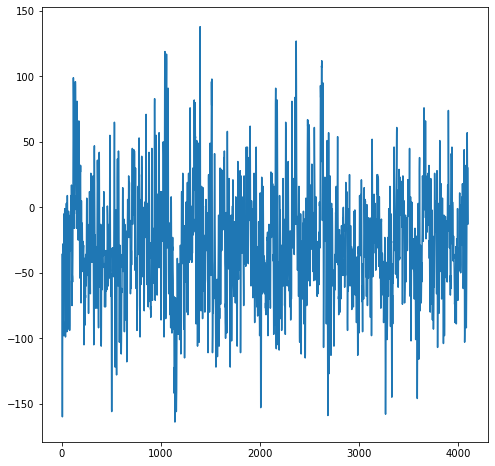

In [19]:
plt.figure(figsize=(8,8))
plt.plot(raw_dataset['A'][99])


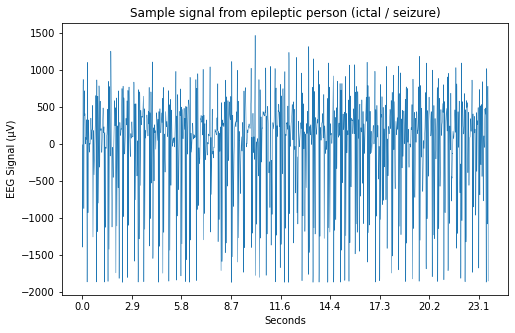

In [56]:
s = 'E'
index = 46

plot_title = ''
if (s in ['A', 'B']):
    plot_title = 'Sample signal from non-epileptic person'
elif (s in ['C', 'D']):
    plot_title = 'Sample signal from epileptic person (non-ictal / non-seizure)'
elif (s == 'E'):
    plot_title = 'Sample signal from epileptic person (ictal / seizure)'
else:
    print('s can be one of A,B,C,D,E')

plt.figure(figsize=(8,5))
plt.plot(raw_dataset[s][index], linewidth=0.5)
plt.title(plot_title)
plt.xlabel('Seconds')
plt.ylabel('EEG Signal (\u00B5V)')
tick_points = np.arange(0,9)*500 # each signal contains 4097 data points [   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]

#tickpoints:array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])
plt.xticks(tick_points, np.round((tick_points/173.16)*10)/10) # mapping n-th data point to the time in seconds from the start of signal (173.16 Hz)
plt.show()

In [57]:
total_points=0
for s,Xset_raw in raw_dataset.items():
    total_points = Xset_raw.shape[1]
total_points    

4097

In [58]:
raw_dataset.items()


dict_items([('A', array([[  12.,   22.,   35., ...,  -11.,    8.,   77.],
       [ -56.,  -50.,  -64., ..., -173., -162.,  -82.],
       [ -37.,  -22.,  -17., ...,    3.,    4.,   82.],
       ...,
       [ -51.,  -42.,  -39., ...,   -2.,    0.,  -49.],
       [  56.,   55.,   38., ...,  -32.,   -4.,   69.],
       [ -36.,  -71., -120., ...,    3.,  -13.,   30.]])), ('B', array([[-24., -22., -17., ...,  22.,   9., -74.],
       [-55., -48., -48., ..., -84., -60.,  40.],
       [-36., -40., -36., ...,  37.,  20., -39.],
       ...,
       [ 27.,   4.,   1., ...,  65.,  47.,  36.],
       [ -6., -19., -47., ..., -62., -43., -42.],
       [-18., -13.,   0., ...,  52.,  -4., -56.]])), ('C', array([[-42., -39., -35., ..., -37., -40., -64.],
       [ 50.,  48.,  45., ..., -14.,  -9., -37.],
       [-54., -56., -57., ..., -38., -42.,   5.],
       ...,
       [-11., -23., -22., ...,  16.,  13., -29.],
       [ 13.,  22.,  29., ..., -55., -46.,  -2.],
       [-62., -64., -62., ...,  -1.,   0.,

In [59]:
def create_augmented_dataset(raw_dataset, window_size = 512, stride = 64, verbose=False):
    augmented_dataset = { }

    for s,Xset_raw in raw_dataset.items():
        
        if (verbose):
            print('Processing set ' + s)

        total_points = Xset_raw.shape[1]

        # no. of examples generated from single training example using sliding window
        # = floor((total_points - window_size) / stride) + 1
        iterations = ((total_points - window_size) // stride) + 1 #((4097-512)//64) + 1

        for x_raw in Xset_raw:

            for i in range(iterations):
                window_slice_from = i*stride
                window_slice_to = i*stride + window_size

                if (s in augmented_dataset):
                    augmented_dataset[s] = np.append(augmented_dataset[s], [x_raw[window_slice_from:window_slice_to]], axis=0)
                else:
                    augmented_dataset[s] = np.array([x_raw[window_slice_from:window_slice_to]])

    print(augmented_dataset)
    if (verbose):
        print('Done.')
    return augmented_dataset


In [60]:
raw_dataset_train = { }
raw_dataset_dev = { }
raw_dataset_test = { }

for s,Xset_raw in raw_dataset.items():
    
    # randomly shuffle the data, just to make sure
    # that all train/dev/test sets come from same
    # distribution, (possibly not from a same person)
    np.random.shuffle(raw_dataset[s])
    
    ninety_percent = np.floor(0.9 * raw_dataset[s].shape[0]).astype(int)
    five_percent = np.floor(0.05 * raw_dataset[s].shape[0]).astype(int)
    
    # train set 0 - 89 (90%)
    raw_dataset_train[s] = raw_dataset[s][0:ninety_percent,:]
    
    # dev set 90 - 94 (5%)
    raw_dataset_dev[s] = raw_dataset[s][ninety_percent:ninety_percent+five_percent,:]
    
    # test set 95 - 99 (5%)
    raw_dataset_test[s] = raw_dataset[s][ninety_percent+five_percent:,:]

In [61]:
print(raw_dataset_train['D'].shape)
print(raw_dataset_dev['A'].shape)
print(raw_dataset_test['C'].shape)

(90, 4097)
(5, 4097)
(5, 4097)


In [62]:
print("Augmenting training data")
aug_dataset512_train = create_augmented_dataset(raw_dataset_train, window_size=512, stride=64, verbose=True)

print("Augmenting dev data")
aug_dataset512_dev = create_augmented_dataset(raw_dataset_dev, window_size=512, stride=256, verbose=True)

print("Augmenting test data")
aug_dataset512_test = create_augmented_dataset(raw_dataset_test, window_size=512, stride=256, verbose=True)

Augmenting training data
Processing set A
Processing set B
Processing set C
Processing set D
Processing set E
{'A': array([[ 63.,  43.,  47., ...,  59.,  37.,  14.],
       [ 88.,  60.,  60., ...,  51.,  80.,  78.],
       [ 32.,  52.,  55., ...,  75.,  76.,  73.],
       ...,
       [ 54.,  50.,  34., ...,  -2., -16., -29.],
       [-78., -74., -57., ...,   7.,  -6.,  -4.],
       [-43., -64., -66., ..., -45., -32.,  -4.]]), 'B': array([[-136., -121.,  -84., ...,   61.,   82.,   86.],
       [ 131.,  103.,   64., ...,   69.,   33.,   17.],
       [ -89., -101.,  -82., ...,  -22.,  -26.,  -44.],
       ...,
       [ -69.,  -76.,  -62., ...,  -44.,  -47.,  -46.],
       [-128., -119.,  -95., ...,  -23.,  -47.,  -64.],
       [  39.,   59.,   72., ...,   50.,   37.,   10.]]), 'C': array([[ 47.,  45.,  40., ..., -26., -31., -38.],
       [ 31.,  26.,  17., ...,  33.,  28.,  18.],
       [ 43.,  45.,  50., ...,  53.,  52.,  57.],
       ...,
       [-37., -28., -18., ...,  39.,  31.,  19.]

In [63]:
aug_dataset512_train['A'].shape,aug_dataset512_test['B'].shape,aug_dataset512_dev['A'].shape #

((5130, 512), (75, 512), (75, 512))

In [64]:
print('Augmenting training data')
aug_dataset1024_train = create_augmented_dataset(raw_dataset_train, window_size=1024, stride=128, verbose=True)

print ('Augmenting dev data')
aug_dataset1024_dev = create_augmented_dataset(raw_dataset_dev, window_size=1024, stride=512, verbose=True)

print('Augmenting test data')
aug_dataset1024_test = create_augmented_dataset(raw_dataset_test, window_size=1024, stride=512, verbose=True)

Augmenting training data
Processing set A
Processing set B
Processing set C
Processing set D
Processing set E
{'A': array([[ 63.,  43.,  47., ..., 114., 101.,  88.],
       [ 32.,  52.,  55., ..., -23., -26., -19.],
       [ 65.,  25.,  -3., ...,  58.,  65.,  75.],
       ...,
       [  8.,  -9., -19., ..., -57., -70., -54.],
       [-60., -26., -19., ...,  -2., -16., -29.],
       [-26., -42., -33., ..., -45., -32.,  -4.]]), 'B': array([[-136., -121.,  -84., ...,    8.,  -18.,  -46.],
       [ -89., -101.,  -82., ...,  107.,   97.,   77.],
       [ -91.,  -27.,   11., ...,   49.,   15.,    2.],
       ...,
       [  -6.,   -4.,    0., ...,   -1.,  -26.,  -33.],
       [  30.,   10.,   -4., ...,  -44.,  -47.,  -46.],
       [  29.,   36.,   34., ...,   50.,   37.,   10.]]), 'C': array([[47., 45., 40., ...,  0., -8., -4.],
       [43., 45., 50., ..., 30., 38., 42.],
       [31., 27., 29., ..., 16., 12., 13.],
       ...,
       [30., 20., 14., ..., 12., 17., 25.],
       [12.,  9.,  5.,

In [65]:
aug_dataset1024_train['A'].shape,aug_dataset1024_test['A'].shape,aug_dataset1024_dev['A'].shape

((2250, 1024), (35, 1024), (35, 1024))

In [66]:
with h5.File(export_to + 'aug_dataset512.h5', 'w') as aug_file512:
    
    train512 = aug_file512.create_group('train')
    dev512 = aug_file512.create_group('dev')
    test512 = aug_file512.create_group('test')

    for s in aug_dataset512_train.keys():
        
        train512.create_dataset(s, data=aug_dataset512_train[s])
        dev512.create_dataset(s, data=aug_dataset512_dev[s])
        test512.create_dataset(s, data=aug_dataset512_test[s])

In [67]:
with h5.File(export_to + 'aug_dataset1024.h5', 'w') as aug_file1024:
    
    train1024 = aug_file1024.create_group('train')
    dev1024 = aug_file1024.create_group('dev')
    test1024 = aug_file1024.create_group('test')

    for s in aug_dataset1024_train.keys():
        
        train1024.create_dataset(s, data=aug_dataset1024_train[s])
        dev1024.create_dataset(s, data=aug_dataset1024_dev[s])
        test1024.create_dataset(s, data=aug_dataset1024_test[s])

In [68]:

# open the file as 'f'
with h5.File(export_to + 'aug_dataset512.h5', 'r') as f:
    data = f['train']
     
    # get the minimum value
    print(min(data))
     
    # get the maximum value
    print(max(data))
    print(data['A'].shape)
    # get the values ranging from index 0 to 15
    #print(data[:15])

A
E
(5130, 512)


In [69]:
aug_file512 = h5.File(export_to + 'aug_dataset512.h5', 'r')
print(aug_file512['train']['A'].shape)
print(aug_file512['dev']['C'].shape)
print(aug_file512['test']['D'].shape)

(5130, 512)
(75, 512)
(75, 512)


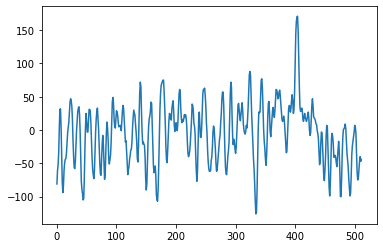

In [70]:
s = 'B'
index = 400
plt.plot(aug_file512['train'][s][index])

In [71]:
aug_file512.close()
aug_file1024.close()

In [72]:
# aug_file512['train'].keys()

In [73]:
# verbose=True
# class_length=len(aug_file512['train']['A']) #5130
# for i in range(class_length):
#     if (verbose and i % (class_length / 5) == 0):
#         print((str)((int)(i / class_length * 100)) + '%')

In [74]:
import tensorflow as tf
 #init = tf.global_variables_initializer()
        #init =tf.compat.v1.global_variables_initializer()
#init=tf.initialize_all_variables()
#init=tf.global_variables_initializer()
#tf.global_variables_initializer
#init =tf.compat.v1.global_variables_initializer()
tf.__version__

'2.3.0'

In [75]:
# For 3 class classification
class_map = { 'A': 0, 'B': 0, 'C': 1, 'D': 1, 'E': 2 }

def read_dataset_and_one_hot_labels(filepath, setname, verbose=False):
    """
    Converts the dataset's labels into one-hot encoding
    
    Parameters:
    filepath: augmented dataset without one-hot encoding
    setname: either 'train', 'dev', or 'test'
    verbose: Display progress
    
    Returns:
    data: dataset with keys X_<setname>, Y_<setname>_classname, and Y_<setname> (one-hot labels). 
    """
    
    data = { }

    # Read dataset that is already stored in the file
    with h5.File(filepath, 'r') as aug_file:

        # classes are AB, CD, and E
        no_of_classes = 3

        for s in aug_file[setname].keys():
            
            if (verbose):
                print("Processing class: " + s)
            
            class_length = len(aug_file[setname][s])
            
            # go through each example in the class
            for i in range(class_length):
                
                if (verbose and i % (class_length / 5) == 0):
                    print((str)((int)(i / class_length * 100)) + '%')
                
                # create a big (combination of all classes) dataset
                # and also set their labels in a separate array
                if (('X_' + setname) in data):
                    data['X_' + setname] = np.append(data['X_' + setname], [aug_file[setname][s][i]], axis=0)
                    data['Y_' + setname + '_classname'] = np.append(data['Y_' + setname + '_classname'], [class_map[s]], axis=0)
                else:
                    data['X_' + setname] = np.array([aug_file[setname][s][i]])
                    data['Y_' + setname + '_classname'] = np.array([class_map[s]])


        
        if (verbose):
            print("Converting to one_hot")
            
        # use tensorflow one_hot function to convert labels into one_hot values
        #tf.reset_default_graph()
        #tf.compat.v1.reset_default_graph()
        
        #init = tf.global_variables_initializer()
        #init=tf.initialize_all_variables()
#         init =tf.compat.v1.global_variables_initializer()
#         with tf.compat.v1.Session() as sess:
#             sess.run(init)
#             data['Y_' + setname] = sess.run(tf.one_hot(data['Y_' + setname + '_classname'], depth=no_of_classes, axis=-1))
        
        data['Y_' + setname] = tf.one_hot(data['Y_' + setname + '_classname'], depth=no_of_classes, axis=-1)
        if (verbose):
            print("Done.")

    return data

In [76]:
print("Converting training set to one hot")
data512_train = read_dataset_and_one_hot_labels(export_to + 'aug_dataset512.h5', 'train', verbose=True)
print("Converting dev set to one hot")
data512_dev = read_dataset_and_one_hot_labels(export_to + 'aug_dataset512.h5', 'dev', verbose=True)
print("Converting test set to one hot")
data512_test = read_dataset_and_one_hot_labels(export_to + 'aug_dataset512.h5', 'test', verbose=True)

Converting training set to one hot
Processing class: A
0%
20%
40%
60%
80%
Processing class: B
0%
20%
40%
60%
80%
Processing class: C
0%
20%
40%
60%
80%
Processing class: D
0%
20%
40%
60%
80%
Processing class: E
0%
20%
40%
60%
80%
Converting to one_hot
Done.
Converting dev set to one hot
Processing class: A
0%
20%
40%
60%
80%
Processing class: B
0%
20%
40%
60%
80%
Processing class: C
0%
20%
40%
60%
80%
Processing class: D
0%
20%
40%
60%
80%
Processing class: E
0%
20%
40%
60%
80%
Converting to one_hot
Done.
Converting test set to one hot
Processing class: A
0%
20%
40%
60%
80%
Processing class: B
0%
20%
40%
60%
80%
Processing class: C
0%
20%
40%
60%
80%
Processing class: D
0%
20%
40%
60%
80%
Processing class: E
0%
20%
40%
60%
80%
Converting to one_hot
Done.


In [77]:
with h5.File(export_to + 'datafile512.h5', 'w') as datafile512:

    datafile512.create_dataset('X_train', data=data512_train['X_train'])
    datafile512.create_dataset('Y_train_classname', data=data512_train['Y_train_classname'])
    datafile512.create_dataset('Y_train', data=data512_train['Y_train'])
    
    datafile512.create_dataset('X_dev', data=data512_dev['X_dev'])
    datafile512.create_dataset('Y_dev_classname', data=data512_dev['Y_dev_classname'])
    datafile512.create_dataset('Y_dev', data=data512_dev['Y_dev'])
    
    datafile512.create_dataset('X_test', data=data512_test['X_test'])
    datafile512.create_dataset('Y_test_classname', data=data512_test['Y_test_classname'])
    datafile512.create_dataset('Y_test', data=data512_test['Y_test'])

In [78]:
print("Converting training set to one hot")
data1024_train = read_dataset_and_one_hot_labels(export_to + 'aug_dataset1024.h5', 'train', verbose=True)
print("Converting dev set to one hot")
data1024_dev = read_dataset_and_one_hot_labels(export_to + 'aug_dataset1024.h5', 'dev', verbose=True)
print("Converting test set to one hot")
data1024_test = read_dataset_and_one_hot_labels(export_to + 'aug_dataset1024.h5', 'test', verbose=True)

Converting training set to one hot
Processing class: A
0%
20%
40%
60%
80%
Processing class: B
0%
20%
40%
60%
80%
Processing class: C
0%
20%
40%
60%
80%
Processing class: D
0%
20%
40%
60%
80%
Processing class: E
0%
20%
40%
60%
80%
Converting to one_hot
Done.
Converting dev set to one hot
Processing class: A
0%
20%
40%
60%
80%
Processing class: B
0%
20%
40%
60%
80%
Processing class: C
0%
20%
40%
60%
80%
Processing class: D
0%
20%
40%
60%
80%
Processing class: E
0%
20%
40%
60%
80%
Converting to one_hot
Done.
Converting test set to one hot
Processing class: A
0%
20%
40%
60%
80%
Processing class: B
0%
20%
40%
60%
80%
Processing class: C
0%
20%
40%
60%
80%
Processing class: D
0%
20%
40%
60%
80%
Processing class: E
0%
20%
40%
60%
80%
Converting to one_hot
Done.


In [79]:
with h5.File(export_to + 'datafile1024.h5', 'w') as datafile1024:

    datafile1024.create_dataset('X_train', data=data1024_train['X_train'])
    datafile1024.create_dataset('Y_train_classname', data=data1024_train['Y_train_classname'])
    datafile1024.create_dataset('Y_train', data=data1024_train['Y_train'])
    
    datafile1024.create_dataset('X_dev', data=data1024_dev['X_dev'])
    datafile1024.create_dataset('Y_dev_classname', data=data1024_dev['Y_dev_classname'])
    datafile1024.create_dataset('Y_dev', data=data1024_dev['Y_dev'])
    
    datafile1024.create_dataset('X_test', data=data1024_test['X_test'])
    datafile1024.create_dataset('Y_test_classname', data=data1024_test['Y_test_classname'])
    datafile1024.create_dataset('Y_test', data=data1024_test['Y_test'])

In [80]:
def augment_test_example(ex, window_size=512, stride=64):
    """
    Augments one dataset example with sliding window approach
    
    Used with test dataset to create multiple (typically 3) slices from one example
    The majority of the predictions on those 3 slices will be considered
    
    Parameters:
    ex: one example from dataset
    window_size: sliding window size
    stride: sliding window stride
    
    Returns:
    aug_ex: numpy array containing multiple smaller (augmented) examples
    """
    
    total_points = ex.shape[0]
    aug_ex = None
    
    # no. of examples generated from single training example using sliding window
    # = floor((total_points - window_size) / stride) + 1
    iterations = ((total_points - window_size) // stride) + 1

    for i in range(iterations):
        
        # window slice
        window_slice_from = i*stride
        window_slice_to = i*stride + window_size

        try:
            aug_ex = np.append(aug_ex, [ex[window_slice_from:window_slice_to]], axis=0)
        except:
            aug_ex = np.array([ex[window_slice_from:window_slice_to]])
    
    return aug_ex

In [81]:
class_map = { 'A': 0, 'B': 0, 'C': 1, 'D': 1, 'E': 2 }

def create_test_set_for_voting(testset, window_size=512, stride=64, divisions=2):
    """
    Augments whole test set in a way where each example contains multiple smaller slices
    
    The augmented dataset created by this function will be used by accuracy for voting measure
    Each example is divided into several divisions
    Each division consists of multiple slices (smaller examples)
    
    Parameters:
    testset: dictionary containing test examples for each class
    window_size: sliding window size
    stride: sliding window stride
    divisions: number of different examples to create from one example
    
    Returns:
    (new_test_set_X, new_test_set_Y, new_test_set_Y_onehot): numpy array of slices, labels, one-hot labels
    """
    
    new_test_set_X = None
    new_test_set_Y = []
    new_test_set_Y_onehot = None
    
    no_of_classes = 3
    identity = np.eye(no_of_classes)
    
    # loop over classes
    for c,class_data in testset.items():
        
        # loop over training examples
        for ex in class_data:
            
            for d in range(divisions):
                
                division_size = ex.shape[0] // divisions
            
                aug_ex = augment_test_example(ex[d*division_size:(d+1)*division_size], window_size=window_size, stride=stride)
                one_hot = identity[class_map[c]]

                try:
                    new_test_set_X = np.append(new_test_set_X, [aug_ex], axis=0)
                    new_test_set_Y_onehot = np.append(new_test_set_Y_onehot, [one_hot], axis=0)
                except:
                    new_test_set_X = np.array([aug_ex])
                    new_test_set_Y_onehot = np.array([one_hot])
                new_test_set_Y = np.append(new_test_set_Y, class_map[c])
        
    return new_test_set_X, new_test_set_Y, new_test_set_Y_onehot

In [82]:
test_X_v_512, test_Y_v_512, test_Y_oh_v_512 = create_test_set_for_voting(raw_dataset_test, window_size=512, stride=256, divisions=4)

In [83]:
test_X_v_1024, test_Y_v_1024, test_Y_oh_v_1024 = create_test_set_for_voting(raw_dataset_test, window_size=1024, stride=512, divisions=2)

In [84]:
print(test_X_v_512.shape)
print(test_X_v_1024.shape)

(100, 3, 512)
(50, 3, 1024)


In [85]:
with h5.File(export_to + 'testset_voting_512.h5', 'w') as testset_voting_512:
    
    testset_voting_512.create_dataset('X', data=test_X_v_512)
    testset_voting_512.create_dataset('Y', data=test_Y_v_512)
    testset_voting_512.create_dataset('Y_onehot', data=test_Y_oh_v_512)

In [86]:
with h5.File(export_to + 'testset_voting_1024.h5', 'w') as testset_voting_1024:
    
    testset_voting_1024.create_dataset('X', data=test_X_v_1024)
    testset_voting_1024.create_dataset('Y', data=test_Y_v_1024)
    testset_voting_1024.create_dataset('Y_onehot', data=test_Y_oh_v_1024)